# Making some quick calculations to get $F_{ij}$ working for $C_l^{TT},C_l^{TE},C_l^{EE}$ observables

In [1]:
import crosspower as cp # branch quickCl
import FisherCl as fcl
import noiseCl as ncl
import camb

# set plotting to be in the notebook instead of its own qt window
%matplotlib inline

"""
This notebook originally a copy of the TT TE EE version, April 13, 2018.

"""

IMPORT ERROR: /opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/quicklens/mpi.pyc (No module named pypar). Could not load pbs or pypar. MPI will not be used.


'\nThis notebook originally a copy of the TT TE EE version, April 13, 2018.\n\n'

In [2]:
# set cosmological parameters

# maybe load a FisherMatrix object and get these from that instead?
"""
cosParams = {
        'H0'    : None, #67.51, #setting H0=None allows cosmomc_theta to be used instead
        'cosmomc_theta'           : 1.04087e-2,
        'ombh2' : 0.02226,
        'omch2' : 0.1193,
        'omk'   : 0,
        'tau'   : 0.063,

        'As'    : 2.130e-9,
        'ns'    : 0.9653,
        'r'     : 0,
        'kPivot': 0.05,
    
        'w'     : -1.0, # actually is w0 but CAMB calls it w
        'wa'    : 0.0,

        # if fiducial mnu is changed, need to adjust omch2 as well
        'mnu'   : 0.06, # (eV)
        #'mnu'   : 0.058, # Lloyd suggested this value for fiducial; adjust omch2 if I do use it
        'nnu'   : 3.046,
        'standard_neutrino_neff'  : 3.046,
        'num_massive_neutrinos'   : 1,
        'neutrino_hierarchy'      : 'normal'}

AccuracyBoost = 3
nonlinear = True
nz = 30000
print 'nonlinear = ',nonlinear
"""

"\ncosParams = {\n        'H0'    : None, #67.51, #setting H0=None allows cosmomc_theta to be used instead\n        'cosmomc_theta'           : 1.04087e-2,\n        'ombh2' : 0.02226,\n        'omch2' : 0.1193,\n        'omk'   : 0,\n        'tau'   : 0.063,\n\n        'As'    : 2.130e-9,\n        'ns'    : 0.9653,\n        'r'     : 0,\n        'kPivot': 0.05,\n    \n        'w'     : -1.0, # actually is w0 but CAMB calls it w\n        'wa'    : 0.0,\n\n        # if fiducial mnu is changed, need to adjust omch2 as well\n        'mnu'   : 0.06, # (eV)\n        #'mnu'   : 0.058, # Lloyd suggested this value for fiducial; adjust omch2 if I do use it\n        'nnu'   : 3.046,\n        'standard_neutrino_neff'  : 3.046,\n        'num_massive_neutrinos'   : 1,\n        'neutrino_hierarchy'      : 'normal'}\n\nAccuracyBoost = 3\nnonlinear = True\nnz = 30000\nprint 'nonlinear = ',nonlinear\n"

# Load a saved FisherMatrix object for parameters and structure

In [3]:
# load saved Fobj
# get lensing and galaxy Fisher matrix to add

#"""
import pickle

filehandler = open('Fisher_7_6A.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'normal', usePrimaryCMB = True; from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use modelDNDZ3; set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True


# these two have an additional parameter wa but not crossClsPlus,Minus for it, etc.
#filehandler = open('Fisher_7_6X2_w2_wan.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#filehandler = open('Fisher_7_6X4_w2_wan.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,

Fobj = pickle.load(filehandler) 

lmin = Fobj.lmin
#lmin = 2
lmax = Fobj.lmax
#lmax = 3000

nMaps = Fobj.nBins + 1
nCosParams = Fobj.nParams - Fobj.nBins
ells = Fobj.ells
obsNames = Fobj.obsNames
paramList = Fobj.paramList

nz = Fobj.nz
nonlinear = Fobj.nonlinear
AccuracyBoost = Fobj.AccuracyBoost
myParams = Fobj.cosParams


print 'obsNames: ',obsNames
print 'paramList: ',paramList
print 'nonlinear: ',nonlinear
print 'nz: ',nz
#"""


obsNames:  ['k,k', 'k,g1', 'k,g2', 'k,g3', 'k,g4', 'k,g5', 'k,g6', 'g1,g1', 'g1,g2', 'g1,g3', 'g1,g4', 'g1,g5', 'g1,g6', 'g2,g2', 'g2,g3', 'g2,g4', 'g2,g5', 'g2,g6', 'g3,g3', 'g3,g4', 'g3,g5', 'g3,g6', 'g4,g4', 'g4,g5', 'g4,g6', 'g5,g5', 'g5,g6', 'g6,g6']
paramList:  ['ombh2', 'omch2', 'cosmomc_theta', 'As', 'ns', 'tau', 'mnu', 'w', 'wa', 'bin1', 'bin2', 'bin3', 'bin4', 'bin5', 'bin6']
nonlinear:  True
nz:  300000


In [4]:
# get a matterPower object
#reload(cp)
myPk = cp.MatterPower(nz=nz,AccuracyBoost=AccuracyBoost,nonlinear=nonlinear,**myParams)
print 'done.'

neutrino_hierarchy =  normal
starting makePkInterp.


finishing makePkInterp.
done.


In [5]:
# verify that unlensed spectra have zero B component
#doBcheck = True
doBcheck = False
if doBcheck:
    # get pars
    pars = myPk.getPars(lmax=lmax+1,lpa=5.0,AccuracyBoost=AccuracyBoost,**myParams)
    #get the selected power spectra
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars)
    totCL=powers['total']
    unlensedCL=powers['unlensed_scalar']
    print(totCL.shape,unlensedCL.shape)
    
    
    # plot the B components
    #Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
    #The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).    
    ls = np.arange(totCL.shape[0])
    fig, ax = plt.subplots(4,2, figsize = (24,12))
    
    ax[0,0].plot(ls,totCL[:,0], color='k')
    ax[0,0].plot(ls,unlensedCL[:,0], color='r')
    ax[0,0].set_title(r'$TT$')
    ax[0,1].plot(ls[2:], 1-unlensedCL[2:,0]/totCL[2:,0])
    ax[0,1].set_title(r'$\Delta TT$')
    
    ax[1,0].plot(ls,totCL[:,1], color='k')
    ax[1,0].plot(ls,unlensedCL[:,1], color='r')
    ax[1,0].set_title(r'$EE$')
    ax[1,1].plot(ls[2:], 1-unlensedCL[2:,1]/totCL[2:,1])
    ax[1,1].set_title(r'$\Delta EE$')
    
    ax[2,0].plot(ls,totCL[:,0], color='k')
    ax[2,0].plot(ls,unlensedCL[:,3], color='r')
    ax[2,0].set_title(r'$TE$')
    ax[2,1].plot(ls[2:], 1-unlensedCL[2:,3]/totCL[2:,3])
    ax[2,1].set_title(r'$\Delta TE$')
    
    ax[3,0].plot(ls,totCL[:,1], color='k')
    ax[3,0].plot(ls,unlensedCL[:,2], color='r')
    ax[3,0].set_title(r'$BB$')
    ax[3,1].plot(ls[2:], 1-unlensedCL[2:,2]/totCL[2:,2])
    ax[3,1].set_title(r'$\Delta BB$')
    
    
    for ax in ax.reshape(-1): ax.set_xlim([2,2500])
    plt.show()

    

# get sigmas for comparison

In [6]:
doComparison = True
myLmin = 30
getSigmas = lambda Fij: np.sqrt(np.diag(np.linalg.inv(Fij)))
if doComparison:
    Fij_TEB_original = Fobj.makeFisher(myLmin,TE=True)
    sigmas_TEB_original = getSigmas(Fij_TEB_original)
    for i, paramName in enumerate(paramList[:nCosParams]):
        print paramName, ': ',sigmas_TEB_original[i]

ombh2 :  8.80988471849915e-06
omch2 :  0.0003959759210277408
cosmomc_theta :  8.680089639141158e-06
As :  5.923696448050441e-10
ns :  0.0014251121121470452
tau :  0.12582349865118583
mnu :  0.49521756886450985
w :  52.29416127562633
wa :  134.59611994264677


# Get all cross power spectra

In [7]:
# function for checking the settings as they are being used

def checkPars(pars):
    H0 = pars.H0
    print 'ombh2: ',pars.omegab*(H0/100)**2
    print 'omch2: ',pars.omegac*(H0/100)**2
    print 'H_0: ',H0, '(proxy for theta?)'
    #print 'initial condition vector: ',pars.InitialConditionVector
    print 'As: ',pars.InitPower.ScalarPowerAmp[0]
    print 'ns: ',pars.InitPower.an[0]
    print 'tau: ',pars.Reion.optical_depth
    #print 'omega_n: ',pars.omegan
    print 'omega_n*94*h**2: ',pars.omegan*94*(H0/100)**2
    # need to find w and wa
    
    #print '\n'
    #print pars
    
#checkPars(parsTest)
if False:
    for cParamNum in range(nCosParams):
        print '\nContents of pars objects for parameter set ',cParamNum+1,' for parameter ',paramList[cParamNum], \
              ' with delta ',deltaP[cParamNum]
        checkPars(myParsUpper[cParamNum])
        checkPars(myParsLower[cParamNum])

In [8]:
# copy some setup from FisherCl.py

# parameters list:
# step sizes for discrete derivatives: must correspond to paramList entries!
#   from Allison et. al. (2015) Table III.
nCosParams = 9 # 6 LCDM + Mnu + w0 + wa
paramList = ['ombh2','omch2','cosmomc_theta',  'As', 'ns','tau','mnu', 'w', 'wa']
deltaP =    [ 0.0008, 0.0030,      0.0050e-2,0.1e-9,0.010,0.020,0.020,0.05,0.025] #mnu one in eV

# for testing
#nCosParams = 2
#paramList = [ 'w', 'wa']
#deltaP =    [0.05,0.025]

# cut deltaP in half to match Byeonghee's stepsizes
deltaP = np.array(deltaP)/2.

# double deltaP to see effect
#deltaP = np.array(deltaP)*2.

"""
# get more parameter sets for numeric differentiation
print 'creating parameter sets for making discrete derivatives...'
myParamsUpper = []
myParamsLower = []
#myParsUpper = []
#myParsLower = []
for cParamNum in range(nCosParams):
    #print 'creating matter power spectra for ',paramList[cParamNum],' derivative...'
    print 'creating parameter set for ',paramList[cParamNum],' derivative...'
    # add parameter dictionary to lists; HAVE TO BE COPIES!!!
    myParamsUpper.append(myParams.copy())
    myParamsLower.append(myParams.copy())
    # modify parameter number cParamNum in dictionaries
    myParamsUpper[cParamNum][paramList[cParamNum]] += deltaP[cParamNum]
    myParamsLower[cParamNum][paramList[cParamNum]] -= deltaP[cParamNum]

    #print 'cPramNum: ',cParamNum,', param name: ',paramList[cParamNum]
    #print 'myParamsUpper[cParamNum][paramList[cParamNum]]: ',myParamsUpper[cParamNum][paramList[cParamNum]]
    #print 'myParamsLower[cParamNum][paramList[cParamNum]]: ',myParamsLower[cParamNum][paramList[cParamNum]]
    #print 'deltaP[cParamNum]: ',deltaP[cParamNum]

    # create pars objects and add to lists. 
    #myParsUpper.append(cp.MatterPower.getPars(myPk,**myParamsUpper[cParamNum]))
    #myParsLower.append(cp.MatterPower.getPars(myPk,**myParamsLower[cParamNum]))

    ###### DOING THESE TWO GETPARS CALLS RIGHT AFTER EACH OTHER DESTROYS THE FIRST ONE'S DARK ENERGY SETTING! #####
    ###### NEED TO RE-ORGANIZE SO NEED FOR MYPARSUPPER IS COMPLETELY DONE BEFORE CREATING MYPARSLOWER   #####
"""    
    
# get modified parameter lists for numeric differentiation
print 'creating modified parameter lists . . . '
#myParams = self.cosParams
myParamsUpper = []
myParamsLower = []
for cParamNum in range(nCosParams):
    # add parameter dictionary to lists; HAVE TO BE COPIES!!!
    myParamsUpper.append(myParams.copy())
    myParamsLower.append(myParams.copy())
    # modify parameter number cParamNum in ditionaries
    myParamsUpper[cParamNum][paramList[cParamNum]] += deltaP[cParamNum]
    myParamsLower[cParamNum][paramList[cParamNum]] -= deltaP[cParamNum]
    
print 'done.'

creating modified parameter lists . . . 
done.


In [9]:
# define function for getting cross power spectra for upper or lower 
"""
# old version - delete this
#def getCrossCls(paramList,myParams,myPk,nMaps=3,lmax=5000,lpa=5.0,
#                AccuracyBoost=3,myClName='unlensed_scalar'):
    #"
    Purpose:
    
    Inputs:
        paramList: like FisherMatrix.paramList
            Note: a list of length 1 will cause a differently shaped array to be returned
        myParams: a list of lists of parameters like FisherMatrix.cosParams
            This list must have the same length as paramList
        myPk: a MatterPower object
        
        nMaps: number of maps.  Set to 3 for T,E,B
        lmax: lmax for returned array
        lpa: lensing_power_accuracy setting
        AccuracyBoost: accuracy setting
        myClName: which type of power spectrum to get from CAMB
    Returns:
        crossCls: numpy array of shape (nMaps,nMaps,nCosParams,lmax)
          unless the lenth of paramList is 1, then shape will be (nMaps,nMaps,lmax)
          Note Cl arrays are all zero based (starting at L=0).
          Note L=0,1 entries will be zero by default.
    #"

    nCosParams = paramList.__len__()
    
    crossCls = np.zeros((nMaps,nMaps,nCosParams,lmax+1))
    for paramNum in range(nCosParams):
        print 'getting Cl power spectra for perturbed parameter ',paramList[paramNum]
        # get pars
        pars = cp.MatterPower.getPars(myPk,lmax=lmax+1,lpa=lpa,AccuracyBoost=AccuracyBoost,
                                      **myParams[paramNum])
        #get the selected power spectra
        results = camb.get_results(pars)
        powers = results.get_cmb_power_spectra(pars)
        myCl = powers[myClName]
        
        #store them
        #The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).
        crossCls[0,0,paramNum]  = myCl[:lmax+1,0] # TT
        crossCls[0,1,paramNum]  = myCl[:lmax+1,3] # TE
        crossCls[1,0,paramNum]  = myCl[:lmax+1,3] # ET
        crossCls[1,1,paramNum]  = myCl[:lmax+1,1] # EE
        if nMaps == 3:
            crossCls[2,2,paramNum]  = myCl[:lmax+1,2] # BB
        
        # reshape for unperterbed version
        if nCosParams == 1:
            crossCls = np.reshape(crossCls,(nMaps,nMaps,lmax+1))
    return crossCls
"""    
    
def getCrossClsP(paramList,myParams,myPk, nMaps=3,lmax=5000,lpa=5.0,
                   AccuracyBoost=3,myClName='unlensed_scalar'):
    """
    Purpose:
        get the crossCls for primary CMB: TT,TE,EE,BB
    Inputs:
        paramList: like FisherMatrix.paramList, but only contains parameter
            names for those which are to be varied
            Note: a list of length 1 will cause a differently shaped array 
            to be returned
        myParams: a list of lists of parameters like FisherMatrix.cosParams
            This list must have the same length as paramList
        myPk: a MatterPower object
        
        nMaps: number of maps.  Set to 3 for T,E,B; 2 for T,E
        lmax: lmax for returned array.  lmin will be zero
        lpa: lensing_power_accuracy setting
        AccuracyBoost: accuracy setting
        myClName: which type of power spectrum to get from CAMB
    Returns:
        crossCls: numpy array of shape (nMaps,nMaps,nCosParams,lmax)
          unless the lenth of paramList is 1, then shape will be 
            (nMaps,nMaps,lmax)
          Note Cl arrays are all zero based (starting at L=0).
          Note L=0,1 entries will be zero by default.
          Units are microK^2
    """
    nCosParams = paramList.__len__()
    
    crossCls = np.zeros((nMaps,nMaps,nCosParams,lmax+1))
    for paramNum in range(nCosParams):
        print 'getting Cl power spectra for perturbed parameter ', \
              paramList[paramNum]
        # get pars
        pars = cp.MatterPower.getPars(myPk,lmax=lmax+1,lpa=lpa,
                                      AccuracyBoost=AccuracyBoost,
                                      **myParams[paramNum])
        #get the selected power spectra
        results = camb.get_results(pars)
        powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
        myCl = powers[myClName]  #ummm... doing it this way probably creates all 6 spectra, then I throw away 5 of them.
        
        #store them
        #The different CL are always in the order TT, EE, BB, TE 
        #  (with BB=0 for unlensed scalar results).
        crossCls[0,0,paramNum]  = myCl[:lmax+1,0] # TT
        crossCls[0,1,paramNum]  = myCl[:lmax+1,3] # TE
        crossCls[1,0,paramNum]  = myCl[:lmax+1,3] # ET
        crossCls[1,1,paramNum]  = myCl[:lmax+1,1] # EE
        if nMaps == 3:
            crossCls[2,2,paramNum]  = myCl[:lmax+1,2] # BB
        
        # reshape for unperterbed version
        if nCosParams == 1:
            crossCls = np.reshape(crossCls,(nMaps,nMaps,lmax+1))
    return crossCls


In [10]:
# get all cross power spectra
# this cell modified to add BB and fix DE problem

lmax = 5000 # may want to match lmax in other Fisher calculation
lpa = 5.0
pars = myPk.getPars(lmax=lmax,lpa=lpa,AccuracyBoost=AccuracyBoost)

#get the total lensed CMB power spectra versus unlensed
#myClName = 'total'
myClName = 'unlensed_scalar'

# select 2 for T,E, 3 for T,E,B
nMaps = 2 # T,E
#nMaps = 3 # T,E,B
nCls = nMaps*(nMaps+1)/2

#crossCls      = np.zeros((nMaps,nMaps,           lmax))
#crossClsPlus  = np.zeros((nMaps,nMaps,nCosParams,lmax))
#crossClsMinus = np.zeros((nMaps,nMaps,nCosParams,lmax))

# get main set of power spectra
crossCls = getCrossClsP(['(All Fiducial)'],[myParams],myPk,nMaps=nMaps,lmax=lmax,lpa=lpa,
                            AccuracyBoost=AccuracyBoost,myClName=myClName)
# get the perturbed versions
print 'starting upper spectra for numeric derivatives . . . '
crossClsPlus  = getCrossClsP(paramList,myParamsUpper,myPk,nMaps=nMaps,lmax=lmax,lpa=lpa,
                            AccuracyBoost=AccuracyBoost,myClName=myClName)
print 'starting lower spectra for numeric derivatives . . . '
crossClsMinus = getCrossClsP(paramList,myParamsLower,myPk,nMaps=nMaps,lmax=lmax,lpa=lpa,
                            AccuracyBoost=AccuracyBoost,myClName=myClName)

# reset global (dark energy and AccuracyBoost) settings
pars = myPk.getPars(lmax=lmax,lpa=lpa,AccuracyBoost=AccuracyBoost)

ellsP = range(lmax+1)

print 'done'


getting Cl power spectra for perturbed parameter  (All Fiducial)


starting upper spectra for numeric derivatives . . . 
getting Cl power spectra for perturbed parameter  ombh2


getting Cl power spectra for perturbed parameter  omch2


getting Cl power spectra for perturbed parameter  cosmomc_theta


getting Cl power spectra for perturbed parameter  As


getting Cl power spectra for perturbed parameter  ns


getting Cl power spectra for perturbed parameter  tau


getting Cl power spectra for perturbed parameter  mnu


getting Cl power spectra for perturbed parameter  w


getting Cl power spectra for perturbed parameter  wa


starting lower spectra for numeric derivatives . . . 
getting Cl power spectra for perturbed parameter  ombh2


getting Cl power spectra for perturbed parameter  omch2


getting Cl power spectra for perturbed parameter  cosmomc_theta


getting Cl power spectra for perturbed parameter  As


getting Cl power spectra for perturbed parameter  ns


getting Cl power spectra for perturbed parameter  tau


getting Cl power spectra for perturbed parameter  mnu


getting Cl power spectra for perturbed parameter  w


getting Cl power spectra for perturbed parameter  wa


done


(2, 2, 5001)
(2, 2, 9, 5001)
(2, 2, 9, 5001)


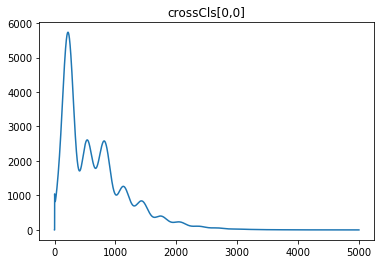

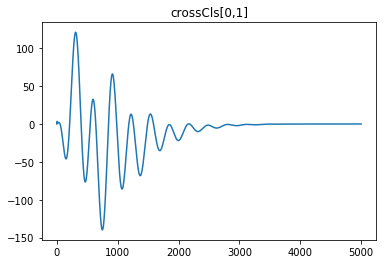

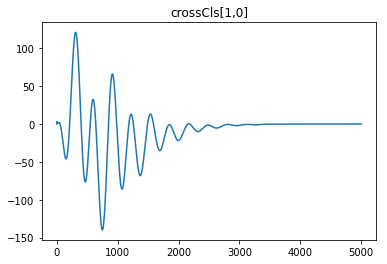

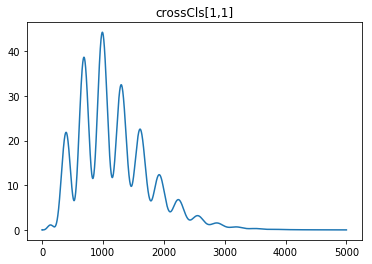

In [11]:
# plot a few
print crossCls.shape
print crossClsPlus.shape
print crossClsMinus.shape
for mapNum in range(nMaps):
    for mapNum2 in range(nMaps):
        plt.plot(ellsP,crossCls[mapNum,mapNum2])
        plt.title('crossCls[{0},{1}]'.format(mapNum,mapNum2))
        plt.show()

# Calculate numerical derivatives

In [12]:
# get derivatives wrt parameters
print 'starting creation of C_l derivatives... '

dClVecs = np.empty((nCls, nCosParams, lmax+1))
for map1 in range(nMaps):
    print 'starting derivative set ',map1+1,' of ',nMaps,'... '
    for map2 in range(map1,nMaps):
        mapIdx  = map1*nMaps+map2 -map1*(map1+1)/2  
                                   # mapIdx = map index
        for pIdx in range(nCosParams):
            dClPlus  = crossClsPlus[map1,map2,pIdx]
            dClMinus = crossClsMinus[map1,map2,pIdx]
            dClVecs[mapIdx, pIdx] = (dClPlus-dClMinus)/(2*deltaP[pIdx])

print 'done.'

starting creation of C_l derivatives... 
starting derivative set  1  of  2 ... 
starting derivative set  2  of  2 ... 
done.


# Add Noise

In [13]:
print 'getting (primary CMB) detector noise...'
import noiseCl as ncl
# CMBS4 v1
fwhm = 1; ST = 1; SP = ST*1.414

def getNoiseClsP(fwhm,ST,SP,lmax,nMaps):
    ellsP = range(lmax+1)
    noiseCMBS4_TT1 = ncl.noisePower(ST,ST,fwhm,ellsP)
    #noiseCMBS4_TP1 = ncl.noisePower(ST,SP,fwhm,ellsP)
    noiseCMBS4_PP1 = ncl.noisePower(SP,SP,fwhm,ellsP)

    # set TE noise to zero
    zerosList = np.zeros(lmax+1)
    noiseCMBS4_TP1 = zerosList

    # shape like crossCls
    if nMaps == 2:
        noiseClsP = np.array([[noiseCMBS4_TT1,noiseCMBS4_TP1],[noiseCMBS4_TP1,noiseCMBS4_PP1]])
    elif nMaps == 3:
        noiseClsP = np.array([[noiseCMBS4_TT1, noiseCMBS4_TP1,      zerosList],
                              [noiseCMBS4_TP1, noiseCMBS4_PP1,      zerosList],
                              [     zerosList,      zerosList, noiseCMBS4_PP1]])
    else:
        'bad nMaps for noise maker'
    return noiseClsP

noiseClsP = getNoiseClsP(fwhm,ST,SP,lmax,nMaps)
print noiseClsP.shape

getting (primary CMB) detector noise...
(2, 2, 5001)


# Create Covariance Matrix

In [14]:
# make covariance matrices with noise
print 'building covariance matrix... '
covarP,invCovP,ellsP,obsListP = Fobj.makeCovar(crossCls,noiseClsP,0,lmax)

print invCovP.shape
print 'lmin = ',ellsP[0]
print 'obsList: ',obsListP

building covariance matrix... 
starting covariance set  1  of  2 ... 
starting covariance set  2  of  2 ... 
(3, 3, 5001)
lmin =  0
obsList:  [0. 1. 3.]


In [15]:
# save covar
# ell values go from 0 to lmax-1
#import pickle 
#pickle.dump(covarP,open('covar.pkl','w'))

# Build the Fisher matrix

In [16]:
#Build Fisher matrix
#myLmin = 50 #to match Allison et. al. and justify no ISW effect
myLmin = 30 # match Byeonghee

def getFisher(myLmin,invCovP,dClVecs,nCosParams,lmax):
    #multply vector.T,invcov,vector and add up
    print 'building Fisher matrix from components...'
    print 'invCovP.shape: ',invCovP.shape,', dClVecs.shape: ',dClVecs.shape
    Fij = np.zeros((nCosParams,nCosParams)) # indices match those in paramList
    for i in range(nCosParams):
        print 'starting bin set ',i+1,' of ',nCosParams
        dClVec_i = dClVecs[:,i,:] # shape (nCls,nElls)
        for j in range(nCosParams):
            dClVec_j = dClVecs[:,j,:] # shape (nCls,nElls)
            # ugh.  don't like nested loops in Python... but easier to program...
            #for ell in range(myLmin-2,lmax+51-2):
            for ell in range(myLmin-2,lmax-2):
              myCov = invCovP[:,:,ell]  #note invCov has no ell=0,1 but dClVecs do
              fij = np.dot(dClVec_i[:,ell+2],np.dot(myCov,dClVec_j[:,ell+2]))
              Fij[i,j] += fij

    print 'creation of Fisher Matrix complete!\n'
    return Fij

Fij = getFisher(myLmin,invCovP,dClVecs,nCosParams,lmax)

# Have a look at it
print 'Fij:'
print Fij
# check eigenvalues
w,v = np.linalg.eigh(np.linalg.inv(Fij))
print 'eigenvalues of F_ij^-1:'
print w

building Fisher matrix from components...
invCovP.shape:  (3, 3, 5001) , dClVecs.shape:  (3, 9, 5001)
starting bin set  1  of  9
starting bin set  2  of  9
starting bin set  3  of  9
starting bin set  4  of  9
starting bin set  5  of  9
starting bin set  6  of  9
starting bin set  7  of  9
starting bin set  8  of  9
starting bin set  9  of  9
creation of Fisher Matrix complete!

Fij:
[[ 1.54612418e+11  1.53857568e+08 -1.58274073e+12  7.69416058e+17
   2.95888770e+09 -3.27391232e+09 -6.56868793e+06 -9.20514938e+05
  -1.30546587e+06]
 [ 1.53857568e+08  3.06869876e+07  1.13177130e+10 -2.52517649e+15
  -4.90817679e+05  1.07525175e+07  7.13834641e+04  2.84729582e+03
   3.76702309e+03]
 [-1.58274073e+12  1.13177130e+10  3.81714811e+13 -8.93106668e+18
  -3.35356443e+10  3.80029572e+10  1.97731220e+08  1.02794511e+07
   1.37798899e+07]
 [ 7.69416058e+17 -2.52517649e+15 -8.93106668e+18  5.45869465e+24
   1.80320977e+16 -2.32282219e+16 -3.70141418e+13 -6.56991055e+12
  -9.40435098e+12]
 [ 2.9588

# Save the results in an augmented Fisher Matrix object file

In [17]:
# Save these as part of Fobj.
# Is Fobj loaded?
Fobj.FijTE = Fij
Fobj.dClVecsP = dClVecs[:,:,lmin:]
Fobj.covarP = covarP[:,:,lmin:]
Fobj.invCovP = invCovP[:,:,lmin:]

Fobj.crossClsP      = crossCls[:,:,lmin:]
Fobj.crossClsPPlus  = crossClsPlus[:,:,:,lmin:]
Fobj.crossClsPMinus = crossClsMinus[:,:,:,lmin:]

Fobj.noiseClsP = noiseClsP[:,:,lmin:]

Fobj.ellsP = ellsP[lmin:]
Fobj.lminP = lmin
Fobj.lmaxP = lmax  
Fobj.nMapsP = nMaps
Fobj.obsListP = obsListP


In [18]:
# save new Fobj
doSave = True
#doSave = False
if doSave:
    import pickle

    filehandler = open('Fisher_7_6A2.obj','w')
    #filehandler = open('Fisher_7_6X2_w2_wan_TEB.obj','w') # accuracyBoost=3,doNorm=True,lmax=2000, nz=3e5; nonlinear=True,
    #neutrino_hierarchy = 'degenerate'; from FisherCl branch quickCl


    pickle.dump(Fobj,filehandler)
    filehandler.close()

    print 'done'

done


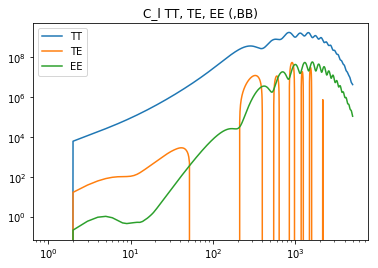

In [19]:
# just take a look at TT, TE, EE, BB
plt.loglog(ellsP,crossCls[0,0]*ellsP*(ellsP+1),label='TT')
#plt.loglog(ellsP,crossCls[0,1]*ellsP*(ellsP+1),label='ET')
plt.loglog(ellsP,crossCls[1,0]*ellsP*(ellsP+1),label='TE')
plt.loglog(ellsP,crossCls[1,1]*ellsP*(ellsP+1),label='EE')
if nMaps == 3 and myClName == 'total': # BB is zero for unlensed spectra
    plt.loglog(ellsP,crossCls[2,2]*ellsP*(ellsP+1),label='BB')
plt.title('C_l TT, TE, EE (,BB)')
plt.legend()
plt.show()

# Check out these uncertainties!

In [20]:
getSigmas = lambda Fij: np.sqrt(np.diag(np.linalg.inv(Fij)))

In [21]:
myLmin = 30
FijTEB = Fobj.makeFisher(myLmin,TE=True)
Fijkg = Fobj.makeFisher(myLmin)
sigmasTEB = getSigmas(FijTEB)
sigmaskg = getSigmas(Fijkg)

print 'from TEB Fisher Matrix:'
for i,paramName in enumerate(paramList[:nCosParams]):
    print paramName, ': ',sigmasTEB[i],', original: ',sigmas_TEB_original[i]

from TEB Fisher Matrix:
ombh2 :  8.687822560083633e-06 , original:  8.80988471849915e-06
omch2 :  0.0003929044726455512 , original:  0.0003959759210277408
cosmomc_theta :  9.379899682808389e-06 , original:  8.680089639141158e-06
As :  6.203960245671781e-10 , original:  5.923696448050441e-10
ns :  0.0011818193930295436 , original:  0.0014251121121470452
tau :  0.18207904393996394 , original:  0.12582349865118583
mnu :  0.44965119118933 , original:  0.49521756886450985
w :  57.827315831102126 , original:  52.29416127562633
wa :  149.13581013376017 , original:  134.59611994264677


In [22]:
# the difference comes from cutting deltaPs in half

# Loop over different noise parameters to create grid of $\sigma(M_\nu)$ values

In [23]:
# define row,col deleting function
def fixParam(Fij,pNum):
    return np.delete(np.delete(Fij,pNum,0),pNum,1)

In [24]:
# define function to get f_ij^kk, or f_ij^gg
def getFijkk(Fobj,myLmin=30,lmax=2000,verbose=False,gg=0):
    """
        Inputs:
            Fobj: a FisherMatrix object
            myLmin, lmax:
            verbose:
            gg: index to extract from diagonal. 
              Must be 0 <= gg <= nBins
              Default: 0 (for Kappa)
        remake kk covar and fisher with noise
        (copy some code from "Rebuild covar with noise")
        Originally written for kk, but modified to do any gg; ZK, 2018.05.10
    """

    """
    Clkk = Fobj.crossCls[0,0]
    Nlkk = Fobj.noiseCls[0,0]
    dClkk = Fobj.dClVecs[0]
    nCosParams = Fobj.nCosParams
    ells = Fobj.ells

    # add noise to crossCls for making covar
    Clkk2 = Clkk+Nlkk

    print 'Clkk shape: ',Clkk2.shape
    print 'dClkk shape: ',dClkk.shape
    cov_kk2 = 2*Clkk2**2 / (2*ells+1)
    """
    # check gg
    if gg < 0 or gg > Fobj.nBins:
        print 'covfefe!'
        return 0
    
    if gg == 0:
        nParams = Fobj.nCosParams
    else:
        nParams = Fobj.nParams
    cov_kk2 = Fobj.covar[gg,gg]
    dClkk = Fobj.dClVecs[gg]
    Fij_kk2 = np.zeros((nParams,nParams))
    lmin = Fobj.lmin
    minEllInd = myLmin-lmin  # eg. 50-2
    maxEllInd = lmax-lmin 
    for pNum1 in range(nParams):
        for pNum2 in range(pNum1,nParams):
            # the next line does the summation over ell
            Fij_kk2[pNum1,pNum2] = np.sum( dClkk[pNum1,minEllInd:maxEllInd] * \
                                           dClkk[pNum2,minEllInd:maxEllInd] / cov_kk2[minEllInd:maxEllInd])
            Fij_kk2[pNum2,pNum1] = Fij_kk2[pNum1,pNum2]
    
    if verbose:
        print 'parameters: ',Fobj.paramList[:nParams]
        print 'kappa-only, noise-included Fisher matrix (from ell = {0} to {1}):'.format(myLmin,lmax)
        print Fij_kk2
    return Fij_kk2

In [25]:
# Load Planck Fisher matrices to add in
Fij_plikHM_TTTEEE_lowTEB = np.loadtxt('Planck_TTTEEE_lowTEB_FromMCMC.txt')
Fij_plikHM_lowTEB = np.loadtxt('Planck_lowTEB_FromMCMC.txt')

# convert 100*theta_MC to theta_MC
mcIndex = 2
mcFac = 100
Fij_plikHM_TTTEEE_lowTEB[:,mcIndex] *= mcFac
Fij_plikHM_TTTEEE_lowTEB[mcIndex,:] *= mcFac
Fij_plikHM_lowTEB[:,mcIndex] *= mcFac
Fij_plikHM_lowTEB[mcIndex,:] *= mcFac

# transform from {\rm{ln}}(10^{10} A_s) to 10^9 As
# only one partial derivative needed
# d( ln(10^10*As)) / d(10^9*As) = 1/(10^9*As)*d(10*10^9*As)/d(10^9*As) = 1/(10^9*As)
TenToTheNineAs_fid = 2.2
AsIndex = 3
Fij_plikHM_TTTEEE_lowTEB[:,AsIndex] *= 1/TenToTheNineAs_fid
Fij_plikHM_TTTEEE_lowTEB[AsIndex,:] *= 1/TenToTheNineAs_fid
Fij_plikHM_lowTEB[:,AsIndex] *= 1/TenToTheNineAs_fid
Fij_plikHM_lowTEB[AsIndex,:] *= 1/TenToTheNineAs_fid



In [26]:
print Fij_plikHM_TTTEEE_lowTEB.shape
print Fij_plikHM_lowTEB.shape

(6, 6)
(6, 6)


In [27]:
# those do not appear to include mnu.  Proceed anyway.

In [37]:
print Fij_plikHM_TTTEEE_lowTEB
print Fij_plikHM_lowTEB
print Fij_plikHM_TTTEEE_lowTEB - Fij_plikHM_lowTEB

[[ 9.36446387e+07  9.21901342e+06 -8.07056642e+08 -6.16081183e+05
   6.17064306e+05  2.67991972e+06]
 [ 9.21901342e+06  4.26855526e+06  1.89304661e+08 -6.23192683e+05
  -1.82030683e+05  2.74710377e+06]
 [-8.07056642e+08  1.89304661e+08  1.49584949e+11 -5.71563536e+07
  -9.59196916e+07  2.50282581e+08]
 [-6.16081183e+05 -6.23192683e+05 -5.71563536e+07  1.66140356e+05
   1.70076039e+05 -7.29190347e+05]
 [ 6.17064306e+05 -1.82030683e+05 -9.59196916e+07  1.70076039e+05
   3.69396337e+05 -7.48672477e+05]
 [ 2.67991972e+06  2.74710377e+06  2.50282581e+08 -7.29190347e+05
  -7.48672477e+05  3.20493551e+06]]
[[ 2.74081311e+03 -5.51716128e+04 -1.86887985e+06  1.11630301e+03
  -9.22019023e+03 -5.98536093e+03]
 [-5.51716128e+04 -3.79389870e+04  3.51786924e+05  2.12165464e+03
  -4.31934392e+02 -1.13114252e+04]
 [-1.86887985e+06  3.51786924e+05  4.86980804e+08  1.62699110e+05
   1.27844649e+05 -7.77298274e+05]
 [ 1.11630301e+03  2.12165464e+03  1.62699110e+05 -8.91652886e+01
  -1.72737148e+02  5.589

In [40]:
# compare to tau prior (5,5 component of Fij)
(0.01**2)**(-1)

10000.0

In [41]:
# this relies on most of what's defined above

tempNoises = [1,3,5,7,9] # muK arcmin
beamSizes  = [1,3,5,7,9] # arcmin
mnuGrid = np.empty((5,5)) # to hold results (tempNoise,beamSize)

# identify indices with parameters and define tau prior
tauIndex = 5
tauPrior = 1/0.01**2
mnuIndex = 6
w0Index  = 7
waIndex  = 8

# define fsky
fsky_S4 = 0.4
fsky_Pl = 0.2 # for additional Planck component
#doPlanck = True
doPlanck = False
        
for i,tempNoise in enumerate(tempNoises):
    for j,beamSize in enumerate(beamSizes):
        print '\nStarting grid point (',i,',',j,')...'
        
        # get noise
        print 'building TE noise arrays...'
        fwhm = beamSize; ST = tempNoise; SP = ST*1.414
        noiseClsP = getNoiseClsP(fwhm,ST,SP,lmax,nMaps)
        
        # make covariance matrices with noise
        print 'building TE covariance matrix... '
        covarP,invCovP,ellsP,obsListP = Fobj.makeCovar(crossCls,noiseClsP,0,lmax)

        # get Fisher matrix
        FijTEB = getFisher(myLmin,invCovP,dClVecs,nCosParams,lmax)
        
        # define and add kappa matrix
        #print 'building reconstuction noise and kappa Fisher matrix...'
        #ells,EB_noise = ncl.getRecNoise(Fobj.lmax,ST,SP,fwhm)
        #Nlkk = EB_noise * ells*(ells+1)/4 # deflection to convergence
        #Fobj.noiseCls[0,0] = Nlkk[Fobj.lmin:Fobj.lmax+1]
        #Fijkk = getFijkk(Fobj,myLmin=30,lmax=2000,verbose=False,gg=0)
        #FijTEB[:Fobj.nCosParams,:Fobj.nCosParams] += Fijkk
        
        # add sigma = 0.01 prior on tau
        #FijTEB[tauIndex,tauIndex] += tauPrior
        
        # fix w0,wa
        FijTEB = fixParam(FijTEB,waIndex)
        FijTEB = fixParam(FijTEB,w0Index)
        
        # derive a TTTEEE only Fij
        #Fij_plikHM_TTTEEE = Fij_plikHM_TTTEEE_lowTEB - Fij_plikHM_lowTEB
        
        # add in Planck and fsky
        if doPlanck:
            FijTEB[:6,:6] += Fij_plikHM_lowTEB  # for Planck l<30
        FijTEB *= fsky_S4
        if doPlanck:
            FijTEB[:6,:6] += Fij_plikHM_TTTEEE_lowTEB*fsky_Pl # for additonal sky not covered by S4 and low ell
            #FijTEB[:6,:6] += Fij_plikHM_TTTEEE*fsky_Pl # for additonal sky not covered by S4
            
        # get sigmas
        sigmasTEB = getSigmas(FijTEB)
        
        # save sigma(mnu)
        mnuGrid[i,j] = sigmasTEB[mnuIndex]*1000 # convert eV to meV
        
print 'done.'
        
print mnuGrid


Starting grid point ( 0 , 0 )...
building TE noise arrays...
building TE covariance matrix... 
starting covariance set  1  of  2 ... 
starting covariance set  2  of  2 ... 
building Fisher matrix from components...
invCovP.shape:  (3, 3, 5001) , dClVecs.shape:  (3, 9, 5001)
starting bin set  1  of  9
starting bin set  2  of  9
starting bin set  3  of  9
starting bin set  4  of  9
starting bin set  5  of  9
starting bin set  6  of  9
starting bin set  7  of  9
starting bin set  8  of  9
starting bin set  9  of  9
creation of Fisher Matrix complete!


Starting grid point ( 0 , 1 )...
building TE noise arrays...
building TE covariance matrix... 
starting covariance set  1  of  2 ... 
starting covariance set  2  of  2 ... 
building Fisher matrix from components...
invCovP.shape:  (3, 3, 5001) , dClVecs.shape:  (3, 9, 5001)
starting bin set  1  of  9
starting bin set  2  of  9
starting bin set  3  of  9
starting bin set  4  of  9
starting bin set  5  of  9
starting bin set  6  of  9
starti

starting bin set  6  of  9
starting bin set  7  of  9
starting bin set  8  of  9
starting bin set  9  of  9
creation of Fisher Matrix complete!


Starting grid point ( 3 , 0 )...
building TE noise arrays...
building TE covariance matrix... 
starting covariance set  1  of  2 ... 
starting covariance set  2  of  2 ... 
building Fisher matrix from components...
invCovP.shape:  (3, 3, 5001) , dClVecs.shape:  (3, 9, 5001)
starting bin set  1  of  9
starting bin set  2  of  9
starting bin set  3  of  9
starting bin set  4  of  9
starting bin set  5  of  9
starting bin set  6  of  9
starting bin set  7  of  9
starting bin set  8  of  9
starting bin set  9  of  9
creation of Fisher Matrix complete!


Starting grid point ( 3 , 1 )...
building TE noise arrays...
building TE covariance matrix... 
starting covariance set  1  of  2 ... 
starting covariance set  2  of  2 ... 
building Fisher matrix from components...
invCovP.shape:  (3, 3, 5001) , dClVecs.shape:  (3, 9, 5001)
starting bin set  1  of

In [29]:
np.savetxt('mnuGrid2.txt',mnuGrid)
print 'done.'

done.


In [30]:
# apply fsky
# no don't since I put it into the function above
#fsky = 0.4
#print mnuGrid*fsky**(-1/2.)
"""
Without Planck, kappa, tau prior
[[623.73708011 623.76322508 630.75762801 763.63954631 852.56601535]
 [623.75032356 623.98416055 649.35661989 800.09016043 871.37396427]
 [623.77678918 624.41835745 663.1839047  816.01139121 879.7008185 ]
 [623.81643453 625.05127388 675.66715508 824.61462656 886.49958658]
 [623.8691962  625.86295317 687.3271559  830.5203843  892.6758684 ]]

without Planck
[[146.02558465 146.02730834 146.4785892  155.58644436 159.00511842]
 [146.02649587 146.04192532 147.85421888 157.27170006 160.00930829]
 [146.02831722 146.07072121 149.06429058 157.8619916  160.63752371]
 [146.03104647 146.11286602 150.13451008 158.17656595 161.03187293]
 [146.03468029 146.16722078 151.06244736 158.39146605 161.2967478 ]]
 
with Planck lowEll
[[152.83969718 152.84164125 153.35069298 163.71934163 167.63165798]
 [152.84072552 152.8581277  154.90289867 165.6467858  168.76896773]
 [152.84278095 152.89060664 156.27144657 166.32042739 169.47953326]
 [152.84586097 152.93814219 157.4852319  166.67926781 169.92767949]
 [152.84996182 152.99944996 158.54030702 166.92488253 170.23022702]]
 
with Planck extra sky
[[43.49546425 43.49849745 44.30453905 56.09930488 60.22180829]
 [43.49700204 43.52415835 46.80491626 58.23859274 61.6603379 ]
 [43.50007566 43.57473451 48.71527304 58.9808941  62.50704689]
 [43.5046812  43.64880989 50.1685217  59.37209887 62.95916629]
 [43.51081283 43.74443316 51.29687047 59.61348843 63.21860998]]
 
with Planck lowEll and extra sky
[[43.52908334 43.53212002 44.33913468 56.14975889 60.27794788]
 [43.5306227  43.5578101  46.8418815  58.29214552 61.71640835]
 [43.53369945 43.60844371 48.75420622 59.0357768  62.56418291]
 [43.5383097  43.68260303 50.20945297 59.42766651 63.01726016]
 [43.54444758 43.77833432 51.33965143 59.66949567 63.27737754]]

"""

[[241.66077999 241.66385384 242.4687353  258.86300829 265.04892358]
 [241.66240594 241.6899212  244.92298798 261.9105651  266.84716819]
 [241.66565586 241.74127492 247.0868522  262.97568599 267.97067094]
 [241.67052579 241.81643521 249.00601533 263.5430625  268.67925234]
 [241.67700981 241.91337132 250.67423556 263.93141347 269.15762199]]


'\nwithout Planck\n[[146.02558465 146.02730834 146.4785892  155.58644436 159.00511842]\n [146.02649587 146.04192532 147.85421888 157.27170006 160.00930829]\n [146.02831722 146.07072121 149.06429058 157.8619916  160.63752371]\n [146.03104647 146.11286602 150.13451008 158.17656595 161.03187293]\n [146.03468029 146.16722078 151.06244736 158.39146605 161.2967478 ]]\n \nwith Planck\n[[43.52908334 43.53212002 44.33913468 56.14975889 60.27794788]\n [43.5306227  43.5578101  46.8418815  58.29214552 61.71640835]\n [43.53369945 43.60844371 48.75420622 59.0357768  62.56418291]\n [43.5383097  43.68260303 50.20945297 59.42766651 63.01726016]\n [43.54444758 43.77833432 51.33965143 59.66949567 63.27737754]]\n\n'

# Combine the Fisher matrices and see smaller sigmas

In [31]:
from prettytable import PrettyTable

print 'comparison of sigma(T,E), sigma(kappa,g), and sigma(T,E,kappa,g):\n'
FijSum = Fijkg.copy()
FijSum[:nCosParams,:nCosParams] += FijTEB

sigmasSum = getSigmas(FijSum)
#infSet = ['inf','inf','inf','inf','inf','inf'] # number of infs needs to be number of bins
infSet = [0,0,0,0,0,0] # number of infs needs to be number of bins
sigmasTEB = np.append(sigmasTEB,infSet)
sigmasSum = np.append(sigmasSum,infSet)
#print sigmasTEB
    
from prettytable import PrettyTable
# for a set of fsky values
for fsky in (1.0,0.75,0.4,0.25):
    fskyFac = np.sqrt(1./fsky)
    print fskyFac
    sigmasA = sigmaskg*fskyFac
    sigmasB = sigmasTEB*fskyFac
    sigmasC = sigmasSum*fskyFac
    t = PrettyTable(['Parameter', 'sigma(T,E)','sigma(k,g)','sigma(T,E,k,g)'])
    for i,p in enumerate(Fobj.paramList):
        t.add_row([p,"%5.3g" % sigmasB[i],"%5.3g" % sigmasA[i],"%5.3g" % sigmasC[i]])
    print 'fsky = {0}:'.format(fsky)
    print t

print 'which Cl used for T,E,B: ',myClName

comparison of sigma(T,E), sigma(kappa,g), and sigma(T,E,kappa,g):



ValueError: operands could not be broadcast together with shapes (9,9) (7,7) (9,9) 

# Compare to Byeonghee's result

In [ ]:
# Byeonghee's result:
# This used lmin 50, lmax 1000, halofit
sigmasB1 = {
    #sigma(b) (4 bins) =  [ 0.01220295  0.0092872   0.01058874  0.03529165]
    'cosmomc_theta' : 0.00015113283201,
    'ombh2' : 0.000504509008534,
    'omch2' : 0.00151341881388,
    'ns' : 0.00732594856064,
    'As' : 0.0618279762973*1e-9,
    'mnu' : 0.0564262366597,
    'w' : 0.088058950571,
    'tau' : 0.0595781322066,
    'bin1' : 0.01220295,
    'bin2' : 0.0092872,
    'bin3' : 0.01058874,
    'bin4' : 0.03529165
}
# This used lmin 50, lmax 1000, halofit, bias by bin
sigmasB2 = {
    'cosmomc_theta' : 7.31905124578e-05,
    'ombh2' : 0.00117829505232,
    'omch2' : 0.00253188668652,
    'ns' : 0.0107531686379,
    'As' : 0.0836156981509*1e-9,
    'mnu' : 0.110362820478,
    'w' : 0.0933472979446,
    'tau' : 8.65882116522,
    'bin1' : 0.01120403,
    'bin2' : 0.0123868,
    'bin3' : 0.01398429,
    'bin4' : 0.0143556
}
# This one was after a late fix Byeonghee did:
"""
+---------------+--------------+--------------+
|   Parameter   | sigma_Z(k,g) | sigma_B(k,g) | 
+---------------+--------------+--------------+
|     ombh2     |   0.00182    |   0.00118    |    
|     omch2     |   0.00509    |   0.00253    |     
| cosmomc_theta |   6.51e-05   |   7.58e-05   |     
|       As      |   9.26e-11   |   1.29e-10   |     
|       ns      |    0.0116    |    0.0190    |    
|      tau      |     0.33     |     8.26     |    
|      mnu      |    0.0884    |     0.11     |      
|       w       |    0.0448    |    0.0411    |       
|      bin1     |    0.011     |    0.0063    |      
|      bin2     |    0.0141    |    0.0056    |    
|      bin3     |    0.0195    |    0.0054    |     
|      bin4     |    0.0236    |    0.0047    |
+---------------+--------------+--------------+"""
sigmasB3 = {
    'cosmomc_theta' : 7.58e-05,
    'ombh2' : 0.00118,
    'omch2' : 0.00253,
    'ns' : 0.0190,
    'As' : 1.29e-10,
    'mnu' : 0.11,
    'w' : 0.0411,
    'tau' : 8.26,
    'bin1' : 0.0063,
    'bin2' : 0.0056,
    'bin3' : 0.0054,
    'bin4' : 0.0047
}


Bsigmas = sigmasB3

print paramList


In [ ]:
"""
# remove tau from my Fisher matrix, since Byeonghee omitted it.
# define row,col deleting function
def fixParam(Fij,pNum):
    return np.delete(np.delete(Fij,pNum,0),pNum,1)
Fij3 = fixParam(Fij2,5) # 5 for neutrinos
sigmas3 = np.sqrt(np.diag(np.linalg.inv(Fij3)))
sigmas3 = np.insert(sigmas3,5,0)
print sigmas3
"""

In [ ]:
"""
# convert sigma_bi to sigma_bi/fid_bi
fidBs = Fobj.binBs
print 'fiducial B_i: ',fidBs
sigmas3[-4:] = sigmas3[-4:]/fidBs
print sigmas3
"""

In [ ]:
"""
#paramList = ['ombh2','omch2','cosmomc_theta','As','ns','tau','mnu']
mask = [True,True,False,True,True,False,True, True,True,True,True]
paramListB = np.array(paramList)
paramListB = np.append(paramListB,['bin1','bin2','bin3','bin4'])
paramListB = paramListB[mask]
sigmasB = sigmas3[mask]
print sigmas3
print sigmasB
print paramListB
print lmin
"""

In [ ]:
from prettytable import PrettyTable
print 'wa and bias marginalized'
t = PrettyTable(['Parameter', 'sigma_Z(k,g)','sigma_B(k,g)','percent diff.'])
for i,p in enumerate(paramList[:8]):
    Zi = sigmasB[i]
    Bi = Bsigmas[paramList[i]]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

In [ ]:
# This comparison has probably lost its meaning